<a href="https://colab.research.google.com/github/rhehgus02/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C(7)_%EB%B6%84%EB%A5%98(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<07> 분류**


## **1. 분류의 개요**

* 지도학습: 레이블, 즉 명시적인 답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

* 분류: 지도학습의 대표적인 유형, 학습 데이터의 피처와 레이블값으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것



---

## **2. 결정 트리(Decision Tree)**

* 결정 트리: 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것
  * 일반적으로 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것
  * 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우함

  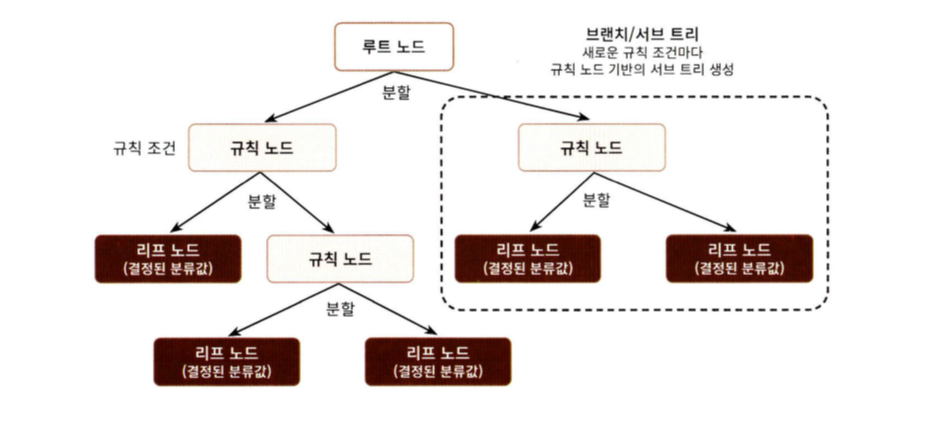

  * 규칙 노드: 규칙 조건이 되는 것(피처를 결합해 만듦)
  * 리프 노드: 결정된 클래스 값

* 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음
 
 -> 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드를 정해야 함

 -> 최대한 균일한 데이터 세트를 구성할 수 있도록 분할해야 함

* 균일도: 한 그룹 내의 데이터들이 서로 비슷할수록 균일도가 높고 혼잡도가 낮음

 -> 결정 노드는 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦

* 균일도를 측정하는 방법
    * 엔트로피를 이용한 정보 이득: 엔트로피는 주어진 데이터 집합의 혼잡도, 정보 이득 지수 = (1-엔트로피 지수), 정보 이득이 높은 속성을 기준으로 분할
    * 지니 계수: 불평등 지수를 나타내는 계수, 0이 가장 평등하고 1로 갈수록 불평등함, 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할

 

---

### **2-1. 결정 트리 모델의 특징**

* 장점: 
    * '균일도'라는 룰을 기반으로 해 알고리즘이 쉽고 직관적이며 시각화 표현까지 가능
    * 정보의 균일도만 신경 쓰면 되므로 보통 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음

* 단점
    * 과적합으로 정확도가 떨어짐
    * 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해짐
        
        -> 사전에 트리의 크기를 제한하는 것이 필요


---

### **2-2. 결정 트리 파라미터**

* 사이킷런 결정 트리 알고리즘: `DecisionTreeClassifier`(분류), `DecisionTreeRegressor`(회귀)

* `min_samples_split`: 노드를 분할하기 위한 최소 샘플 데이터 수
    
    -> 작게 설정할수록 분할되는 노드가 많아 과적합 가능성 증가

* `min_samples_leaf`: 리프 노드가 되기 위한 최소 샘플 데이터 수

    -> 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요

* `max_features`: 최적의 분할을 위해 고려할 최대 피처 개수

    -> 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행

* `max_depth`: 트리의 최대 깊이

    -> 디폴트는 None으로 완벽하게 클래스 결정 값이 될 때까지 계속 분할

---

### **2-3. 결정 트리 모델의 시각화**

* `Graphviz` 패키지: 결정 트리 알고리즘이 어떤 규칙을 가지고 트리를 생성하는지 시각적으로 보여줌

* `export_graphviz()`: 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여줌


In [1]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 붓꽃 데이터 세트를 DecisionTreeClassifier로 학습한 뒤 결정 트리의 형태 확인

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
# export_graphviz(): Graphviz가 읽어 들여서 그래프 형태로 시각화할 수 있는 출력 파일 생성

from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,
                feature_names=iris_data.feature_names, impurity=True, filled=True)

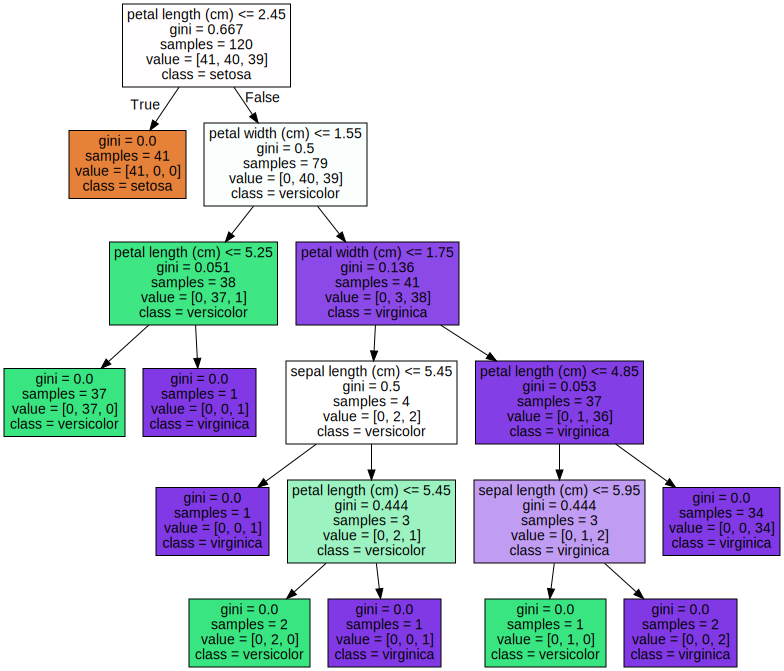

In [4]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

>> 시각화된 도표를 이용해 결정 트리 규칙이 어떻게 구성되는지 자세히 살펴보기

* 리프 노드: 더 이상 자식 노드가 없는 노드
    
    -> 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족시킬 때 가능

* 브랜치 노드: 자식 노드가 있는 노드
    
    -> 맨 위에 자식 노드를 만들기 위한 규칙 조건이 있음

* gini: 해당 노드의 데이터 분포에서의 지니 계수

* samples: 해당 노드의 데이터 건수

* value: 클래스 값 순서대로 데이터 건수

* class: 가장 데이터가 많은 클래스

* 각 노드의 색깔은 레이블 값을 의미
    
    -> 색깔이 짙을수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많음
    

---

* `feature_importances_`: ndarray 형태로 피처 순서대로 피처의 중요도를 반환
    
    -> 값이 높을수록 해당 피처의 중요도가 높음

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

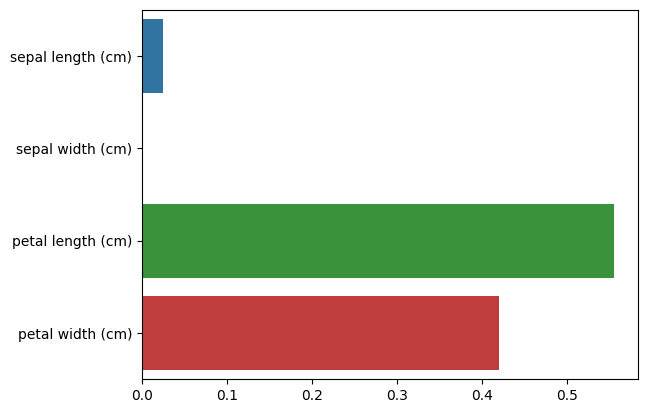

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value:.3f}')

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

>> 여러 피처들 중 'petal_length'가 가장 중요도가 높음을 알 수 있다.

---

### **2-4. 결정 트리 과적합(Overfitting)**

* 학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있음

* `make_classification()`: 분류를 위한 테스트용 데이터를 쉽게 만들 수 있는 함수

    -> 반환값: 피처 데이터 세트, 레이블 데이터 세트


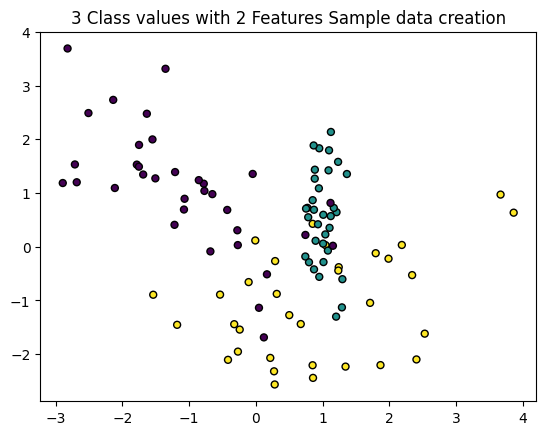

In [6]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

>> 각 피처가 x, y축으로 나열된 2차원 그래프

>> 3개의 클래스 값 구분은 색깔로 돼 있음

In [7]:
import numpy as np

# visualize_boundary() 함수 # Classifier의 Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
   

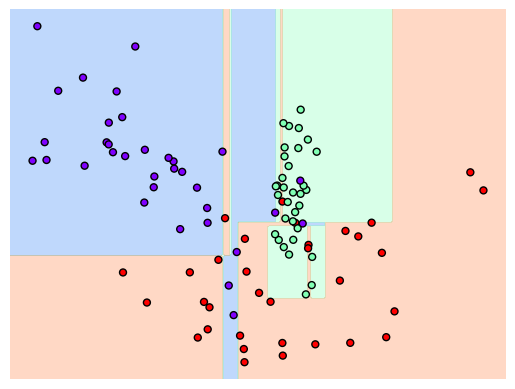

In [8]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

>> 일부 이상치 데이터까지 분류하기 위해 결정 기준 경계가 매우 많아짐

>> 이렇게 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어짐


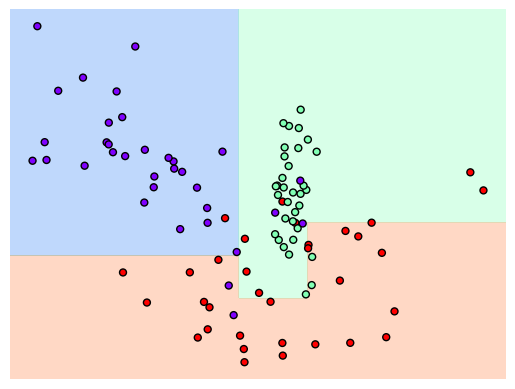

In [9]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

>> 이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됨

>> 두 번째 모델의 예측 성능이 더 뛰어날 가능성이 높음

---

## **3. 앙상블 학습**

* 앙상블: 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

    -> 다양한 분류기를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻음

    -> 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타냄

* 종류: 보팅, 배깅, 부스팅, 스태깅 등

    * 보팅: 서로 다른 알고리즘을 가진 분류기를 결합하여 같은 데이터 세트에 대해 학습하고 예측하는 것

    * 배깅: 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플을 복원추출(Bootstrap)하여 다르게 하는 것 ex) 랜덤 포레스트

    * 부스팅: 여러 개의 분류기가 순차적으로 학습을 하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서 가중치를 부여하면서 학습과 예측을 진행하는 것 ex) Gradient 부스트, XGBoost, LightGBM

    * 스태깅: 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법

    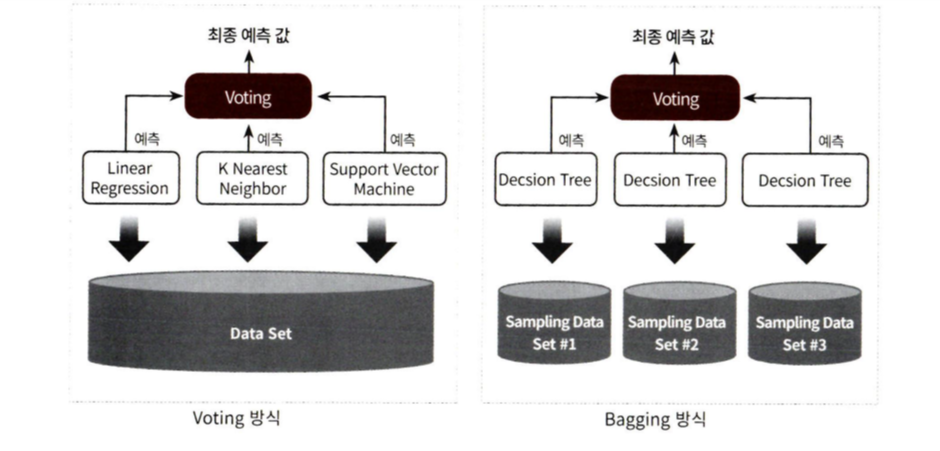

---

### **3-1. 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**

* 하드 보팅: 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것

* 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정하는 것

    -> 일반적으로 소프트 보팅이 예측 성능이 좋아서 이를 보팅 방법으로 적용

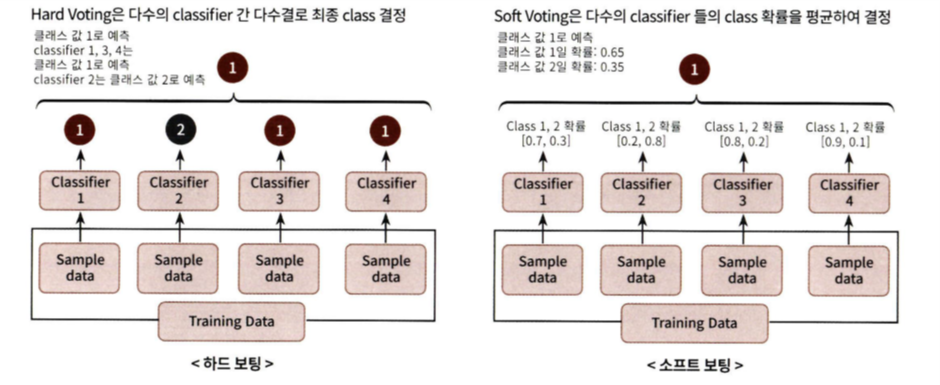

---

### **3-2. 보팅 분류기(Voting Classifier)**

* `VotingClassifier(estimator= , voting= )`: 보팅 방식의 앙상블 구현
    
    * `estimators`: 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받음

    * `voting`: hard-하드 보팅, soft-소프트 보팅(기본은 hard)

* 보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측 분석(로지스틱 회귀와 KNN을 기반)

In [11]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [12]:
# 로지스틱 회귀와 KNN을 기반으로 소프트 보팅 방식으로 보팅 분류기 만들기

# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


>> 보팅 분류기가 정확도가 조금 높게 나타남

>> 하지만 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되는 것은 X

---

## **4. 랜덤 포레스트**

* 배깅: 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘

* 랜덤 포레스트: 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자 데이터를 복원 추출해 학습을 수행한 뒤 최종적으로 보팅을 통해 예측 결정
 
    * 기반 알고리즘: 결정 트리

* 장점: 비교적 빠른 수행 속도, 다양한 영역에서 높은 예측 성능, 결정 트리의 쉽고 직관적인 장점

* Bootstrapping: 여러 개의 데이터 세트를 중첩되게 분리하는 것
    
    -> 서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되어 만들어짐

* `RandomForestClassifier`: 사이킷런 제공 랜덤 포레스트 분류기

In [15]:
from google.colab import drive
drive.mount('/content/drive')

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

# 사용자 행동 데이터셋에 DataFrame을 반환하는 함수
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/자료/features.txt',sep='\s+', header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. Column 명은 feature_name 적용
    My_X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/자료/X_train.txt',sep='\s+', names = feature_name)
    My_X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/자료/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    My_y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/자료/y_train.txt',sep='\s+',header=None,names=['action'])
    My_y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/자료/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return My_X_train, My_X_test, My_y_train, My_y_test

Mounted at /content/drive


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


---

### **4-1. 랜덤 포레스트 하이퍼 파라미터 및 튜닝**

* `n_estimators`: 랜덤 포레스트에서 결정 트리의 개수

* `max_features`: 결정 트리에 사용되는 피처 수 (디폴트는 'sqrt'로 전체 피처의 제곱근 수만큼만 참조)

* `max_depth`, `min_samples_leaf` 등등

In [17]:
# GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행 (n_jobs=-1: 모든 CPU 코어를 이용해 학습 가능)
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [18]:
# n_estimators을 300으로 증가시키고 최적화 하이퍼 파라미터로 다시 학습
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, 
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9165


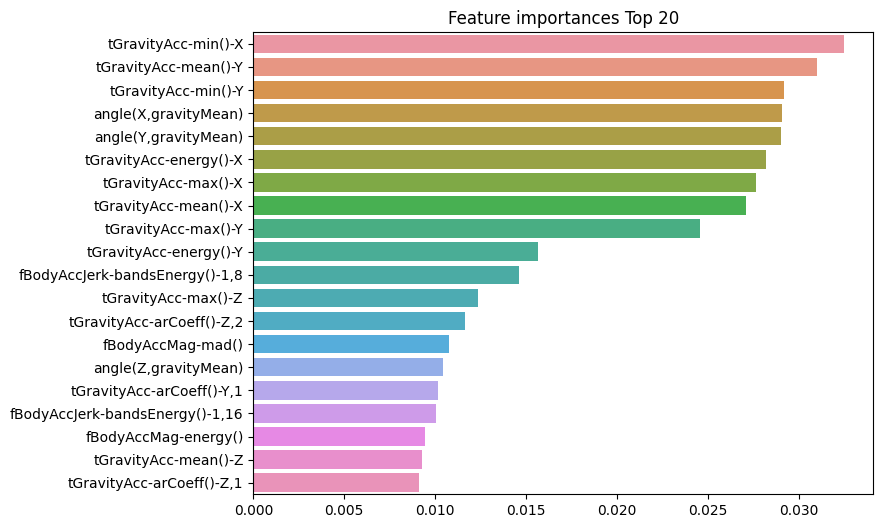

In [19]:
# feature_importances_ 속성을 이용해 피처의 중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

---

## **5. GBM(Gradient Boosting Machine)**

* 부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습 및 예측하면서 잘못 예측한 데이터에 가중치 부여를 해 오류를 개선해 나가면서 학습하는 방식

    ex) 에이다 부스트(AdaBoost), 그래디언트 부스트

* 에이다 부스트: 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘

    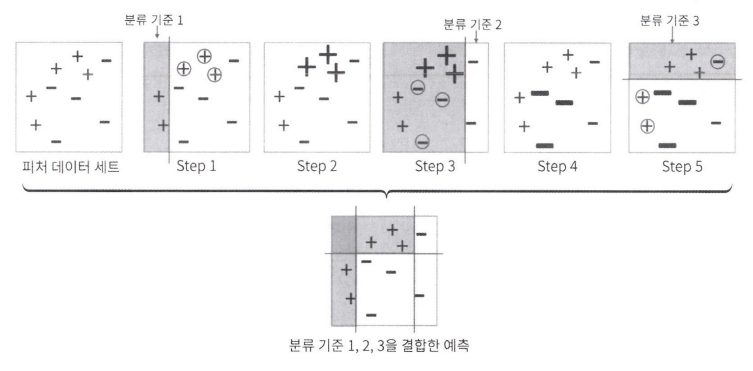

    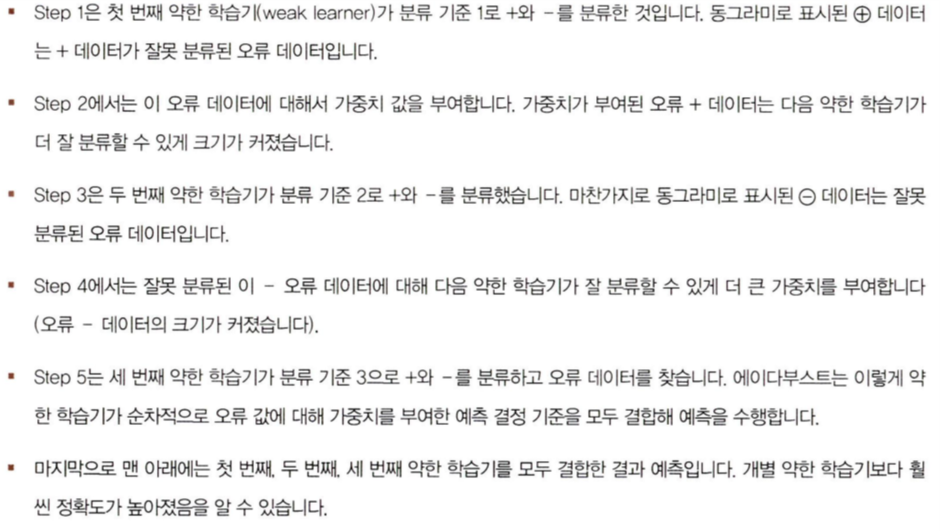

* 그래디언트 부스트: 에이다 부스트와 유사하나, 가중치 업데이트를 경사 하강법을 이용하는 것이 큰 차이

    -> 오류 값은 (실제 값-예측 값)이며, 이 오류 값을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 함

In [ ]:
# GBM을 이용해 사용자 행동 데이터 세트를 예측 분류

from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time() - start_time))

>> 일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 뛰어남

>> 그러나 수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력도 더 필요

---

### **5-1. GBM 하이퍼 파라미터 및 튜닝**

* `loss`: 경사 하강법에서 사용할 비용 함수를 지정 (디폴트는 'deviance')

* `learning_rate`: GBM이 학습을 진행할 때마다 적용하는 학습률, 약한 학습기가 순차적으로 오류 값을 보정해 나가는데 적용하는 계수 (디폴트는 0.1)

    -> 너무 작게 설정하면 업데이트 되는 값이 작아져서 예측 성능이 높아질 수 있지만 수행 시간이 오래 걸리고, 너무 크게 설정하면 최소 오류 값을 찾지 못해 예측 성능이 떨어짐

    -> learning_rate는 n_estimators와 상호 보완적으로 조합해 사용

* `n_estimators`: 약한 학습기의 개수

* `subsample`: 약한 학습기가 학습에 사용하는 데이터의 샘플링 비율

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))